In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

data_dir = "../../data/unziped_data/"

In [7]:
df = pd.read_csv(os.path.join(data_dir, "FTP_SABER11_20142.TXT"), sep='¬', header=0, encoding='utf-8-sig',nrows = 100000)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [8]:
df.head()

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                 TI          COLOMBIA           F           29/03/1996   
1                 CC          COLOMBIA           M           28/01/1992   
2                 TI          COLOMBIA           M           11/06/1997   
3                 TI          COLOMBIA           M           26/11/1998   
4                 TI          COLOMBIA           M           30/09/1996   

   PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE  \
0    20142  SB11201420582606      ESTUDIANTE         COLOMBIA   
1    20142  SB11201420191723      ESTUDIANTE         COLOMBIA   
2    20142  SB11201420256496      ESTUDIANTE         COLOMBIA   
3    20142  SB11201420044518      ESTUDIANTE         COLOMBIA   
4    20142  SB11201420364995      ESTUDIANTE         COLOMBIA   

                      ESTU_ETNIA ESTU_LIMITA_MOTRIZ  ... PUNT_COMP_CIUDADANA  \
0                            NaN                NaN  ...                  40   
1                            NaN                NaN  ...                  44   
2                        Ninguno                NaN  ...                  58   
3  Otro grupo étnico minoritario                NaN  ...                  64   
4                        Ninguno                NaN  ...                  50   

  DECIL_COMP_CIUDADANA PUNT_INGLES DECIL_INGLES DESEMP_INGLES PUNT_GLOBAL  \
0                    2          41            1            A-         199   
1                    3          41            1            A-         211   
2                    8          54            8            A1         265   
3                   10          45            3            A-         294   
4                    5          36            1            A-         228   

   ESTU_PUESTO ESTU_INSE_INDIVIDUAL  ESTU_NSE_INDIVIDUAL  \
0          900            34.553661                 NSE1   
1          821            37.474611                 NSE1   
2          331            58.327602                 NSE3   
3          152            65.708202                 NSE4   
4          666            49.493567                 NSE2   

  ESTU_ESTADOINVESTIGACION  
0                 PUBLICAR  
1                 PUBLICAR  
2                 PUBLICAR  
3                 PUBLICAR  
4                 PUBLICAR  

[5 rows x 137 columns]

## ONE HOT VARIABLES

In [ ]:
'ESTU_DEPTO_RESIDE','FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_OCUPACIONPADRE', 'FAMI_OCUPACIONMADRE', 'FAMI_PISOSHOGAR'

In [27]:
# For Variable 'ESTU_NACIONALIDAD', 'ESTU_PAIS_RESIDE' 
def parse_nacionalidad(value):
    if value == 'Colombia':
        return 1
    elif value != np.NaN:
        return 0
    else:
        return np.NaN

# For Variable 'ESTU_GENERO'
def parse_genero(val):
    if val == 'M':
        return 1
    elif val == 'F':
        return 0
    else:
        return np.nan

# For variable 'ESTU_FECHANACIMIENTO'
def parse_nacimiento(val, year="01-01-2014", min_year=pd.to_datetime("1985-01-01")):
    date = max(pd.to_datetime(val, dayfirst=True, errors='coerce'), min_year)
    return  (pd.to_datetime(year,dayfirst=True) - date).days

# For variable 'ESTU_ETNIA'
def parse_etnia(value):
    if value == 'Ninguno':
        return 0
    elif value != np.NaN:
        return 1
    else:
        return np.NaN
    
# For variable 'ESTU_COD_RESIDE_MCPIO'
def parse_mun_X(codigo, dictX):
    if codigo in dictX.keys():
        return dictX[codigo]
    else:
        return np.nan

#### For variable 'ESTU_AREARESIDE'    
def parse_area_reside(val):
    if val == 'Cabecera Municipal':
        return 1
    elif val == 'Area Rural':
        return 0
    else:
        return np.nan
    
# For Variable 'ESTU_VALORPENSIONCOLEGIO'
def parse_pension_colegio(val):
    if val == "250.000 o más":
        return 5
    elif val == "Entre 150.000 y menos de 250.000":
        return 4
    elif val == "Entre 120.000 y menos de 150.000":
        return 3
    elif val == "Entre 87.000 y menos de 120.000":
        return 2
    elif val == "Menos de 87.000":
        return 1
    elif val == "No paga Pensión":
        return 0
    else:
        return np.nan

#For Variable 'ESTU_VECESPRESENTOEXAMEN'
def parse_veces_examen(val):
    if val == "Ninguna vez":
        return 0
    elif val == "Una vez":
        return 1
    elif val == "Dos veces":
        return 2
    elif val == "Tres veces o más":
        return 3
    else:
        return np.nan
    
#For Variable 'FAMI_ESTRATOVIVIENDA'
def parse_estrato(val):
    if val == 'Estrato 1':
        return 1
    elif val == 'Estrato 2':
        return 2
    elif val == 'Estrato 3':
        return 3
    elif val == 'Estrato 4':
        return 4
    elif val == 'Estrato 5':
        return 5
    elif val == 'Estrato 6':
        return 6
    else:
        return np.nan

# For variable 'FAMI_NIVELSISBEN'
def parse_sisben(val):
    if val == 'No está clasificada por el SISBEN':
        return 0
    elif val == 'Nivel 1':
        return 1
    elif val == 'Nivel 2':
        return 2
    elif val == 'Nivel 3':
        return 3
    elif val == 'Esta clasificada en otro nivel del SISBEN':
        return 4
    else:
        return np.nan

# For Variables 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR'
def parse_numbers(val):
    if val == 'Tres':
        return 3
    elif val == 'Dos':
        return 2
    elif val == 'Cuatro':
        return 4
    elif val == 'Cinco':
        return 5
    elif val == 'Uno':
        return 1
    elif val == 'Seis':
        return 6
    elif val == 'Siete':
        return 7
    elif val == 'Ocho':
        return 8
    elif val == 'Una':
        return 1
    elif val == 'Diez':
        return 10
    elif val == 'Once':
        return 11
    elif val == 'Doce o más':
        return 12
    elif val == 'Diez o más':
        return 10
    elif val == 'Nueve':
        return 9
    elif val == 'Ninguno':
        return 0
    else:
        return np.nan
# For variables   'FAMI_TIENEINTERNET' 'FAMI_TIENECOMPUTADOR' 'FAMI_TIENELAVADORA' 'FAMI_TIENEMICROONDAS' 'FAMI_TIENEHORNO' 'FAMI_TIENESERVICIOTV' 'FAMI_TIENEAUTOMOVIL' 'FAMI_TIENEDVD''FAMI_TIENE_NEVERA'
def parse_Si_No(val):
    if val == 'Si':
        return 1
    elif val == 'No':
        return 0
    else:
        return np.nan

## Colums Dictionary

In [ ]:
column_2_func['FAMI_TIENEINTERNET'] = parse_Si_No
column_2_func['FAMI_TIENECOMPUTADOR'] = parse_Si_No
column_2_func['FAMI_TIENELAVADORA'] = parse_Si_No
column_2_func['FAMI_TIENEMICROONDAS'] = parse_Si_No
column_2_func['FAMI_TIENEHORNO'] = parse_Si_No
column_2_func['FAMI_TIENESERVICIOTV'] = parse_Si_No
column_2_func['FAMI_TIENEAUTOMOVIL'] = parse_Si_No
column_2_func['FAMI_TIENEDVD'] = parse_Si_No
column_2_func['FAMI_TIENE_NEVERA'] = parse_Si_No
column_2_func['FAMI_PERSONASHOGAR'] = parse_numbers
column_2_func['FAMI_CUARTOSHOGAR'] = parse_numbers
column_2_func['FAMI_NIVELSISBEN'] = parse_sisben
column_2_func['FAMI_ESTRATOVIVIENDA'] = parse_estrato
column_2_func['ESTU_VECESPRESENTOEXAMEN'] = parse_veces_examen
column_2_func['ESTU_VALORPENSIONCOLEGIO'] = parse_pension_colegio
column_2_func['ESTU_AREARESIDE'] = parse_area_reside
column_2_func['ESTU_COD_RESIDE_MCPIO'] = parse_mun_X
column_2_func['ESTU_ETNIA'] = parse_etnia
column_2_func['ESTU_FECHANACIMIENTO'] = parse_nacimiento
column_2_func['ESTU_GENERO'] = parse_genero
column_2_func['ESTU_NACIONALIDAD'] = parse_nacionalidad
column_2_func['ESTU_PAIS_RESIDE'] = parse_nacionalidad

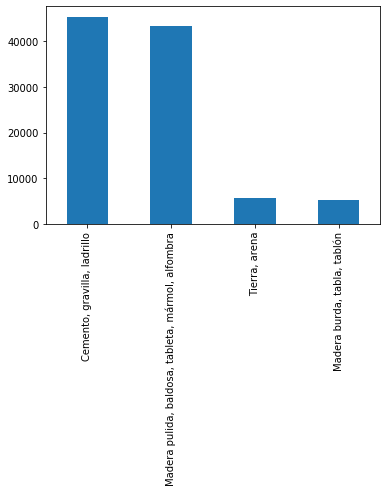

In [25]:
df.FAMI_PISOSHOGAR.value_counts().plot.bar()

## revisar en grupo 

In [ ]:
'ESTU_ESTUDIANTE'